In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import sys

sys.path.append('../../../Enhancer')  
from train.utils import EnhancerDataset, split_dataset, train_model, regression_model_plot, plot_filter_weight
from model.model import DanQ, ConvNetDeep

# Train DanQ

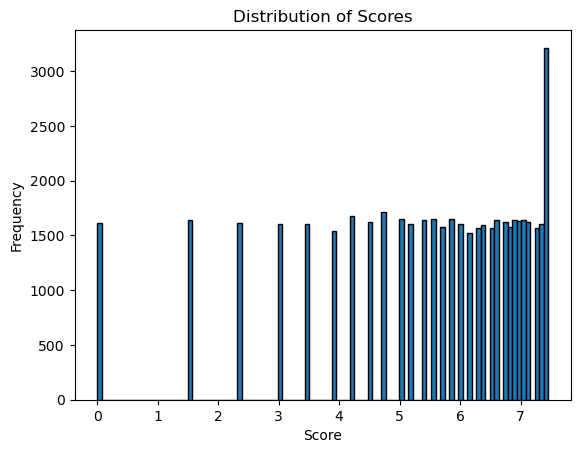

Using device: cuda
Model is on device: cuda:0
Epoch 1/200, Step 1/100, Loss: 33.3401
Epoch 1/200: Train Loss: 2.5181 , Test Loss: 0.6164
------------------------Evaluation------------------------
Label 1: MSE=0.6184, RMSE=0.7864, MAE=0.5980, R^2=0.8171, Pearson=0.9065, Spearman=0.9836
Overall (Flattened): MSE=0.6184, RMSE=0.7864, MAE=0.5980, R^2=0.8171, Pearson=0.9065, Spearman=0.9836
----------------------------------------------------------
Epoch 2/200, Step 1/100, Loss: 0.5212
Epoch 2/200: Train Loss: 0.5380 , Test Loss: 0.4892
------------------------Evaluation------------------------
Label 1: MSE=0.4886, RMSE=0.6990, MAE=0.5270, R^2=0.8555, Pearson=0.9264, Spearman=0.9844
Overall (Flattened): MSE=0.4886, RMSE=0.6990, MAE=0.5270, R^2=0.8555, Pearson=0.9264, Spearman=0.9844
----------------------------------------------------------
Epoch 3/200, Step 1/100, Loss: 0.4306
Epoch 3/200: Train Loss: 0.3520 , Test Loss: 0.2217
------------------------Evaluation------------------------
Labe

In [4]:
# Define some hyperparameters
seed = 42
batch = 400
learning_rate = 1e-4
target_labels = ['Motif Frequency Score']
output_dir = '/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Freq_Results/DanQ_synthetic_freq_motif_results'


#df = pd.DataFrame({'sequence':dna_sequences, 'score': scores})
df = pd.read_pickle("/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Freq_Results/synthetic_freq_sequence.pl")
# Plot histogram of scores
plt.hist(df['score'], bins=100, edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
#plt.ylim(0,300)
plt.show()

train, test = split_dataset(df, split_type='random', cutoff = 0.8, seed = seed)

train = EnhancerDataset(train, feature_list=['score'], scale_mode = 'none')
test = EnhancerDataset(test, feature_list=['score'], scale_mode = 'none')

# DataLoader setup
train_loader = DataLoader(dataset=train, batch_size=batch, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=batch, shuffle=True)

input_model = DanQ(input_length = 608, num_classes = 1)
_, _, model, train_losses_by_batch, test_losses_by_batch, results, best_pearson_epoch, best_r2_epoch, device  = train_model(input_model, train_loader, test_loader, 
                                                                                                                            target_labels=target_labels,num_epochs=200, 
                                                                                                                        batch_size=batch, learning_rate=learning_rate, 
                                                                                                                        criteria='mse',optimizer_type = "adam", patience=10, 
                                                                                                                        seed = seed, save_model= True, dir_path=output_dir)

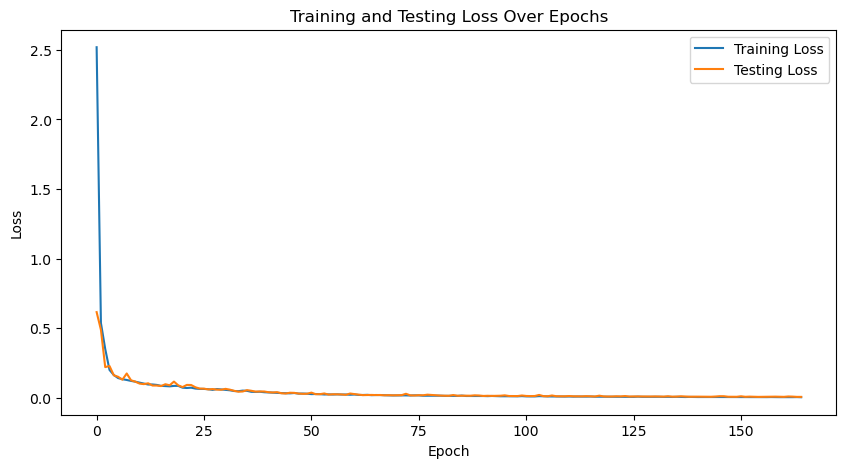

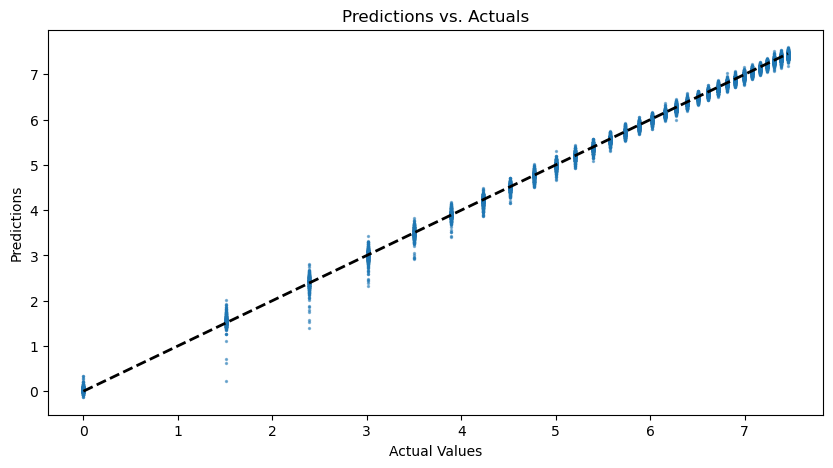

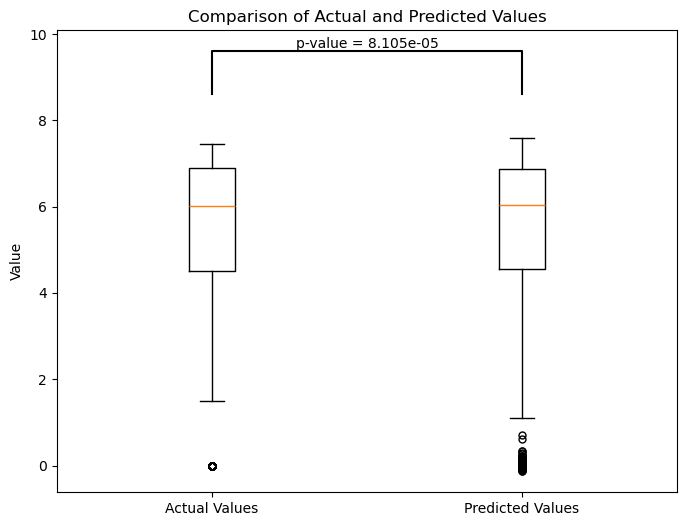

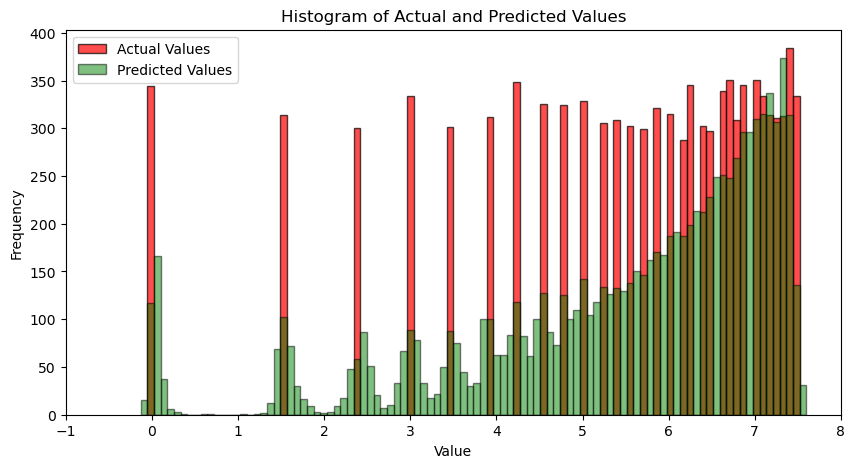

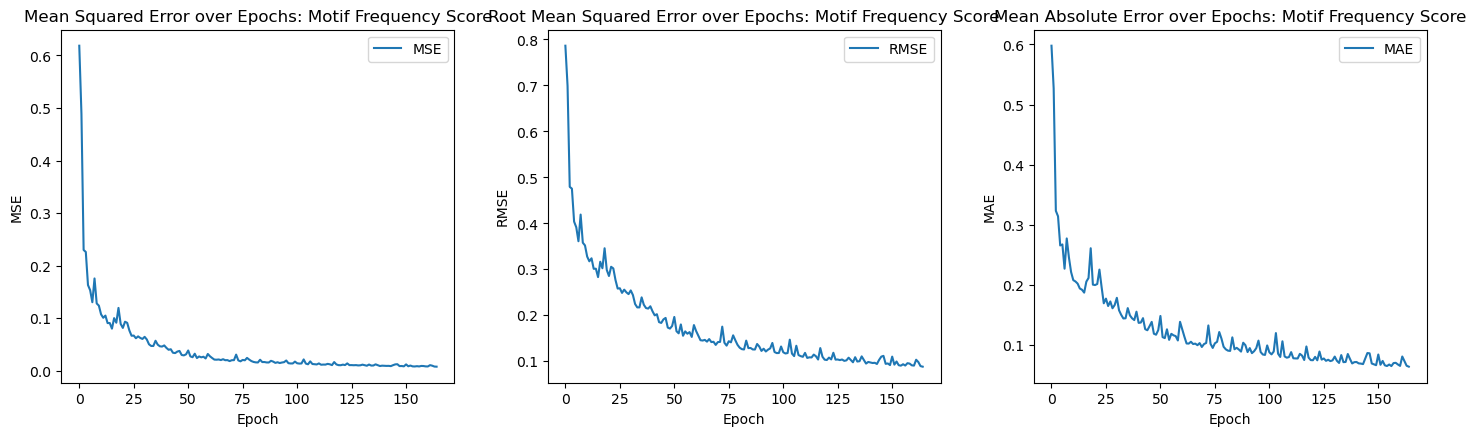

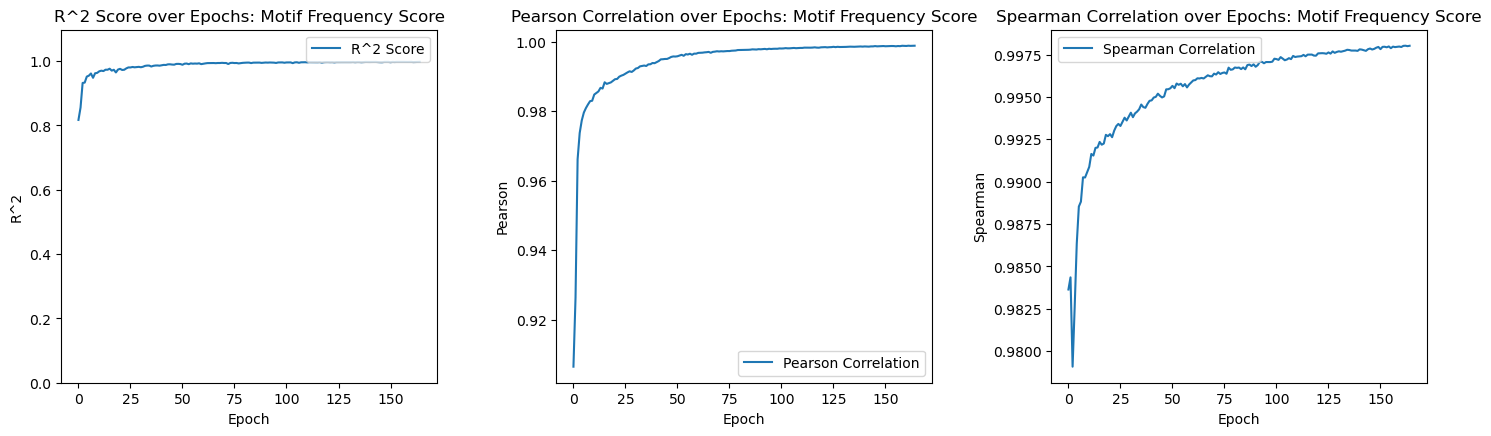

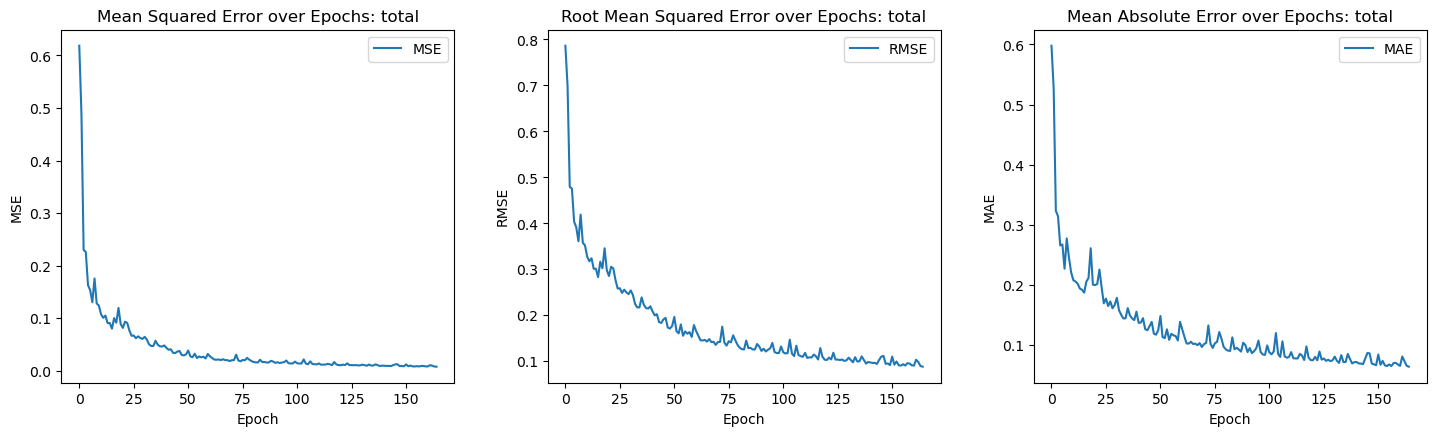

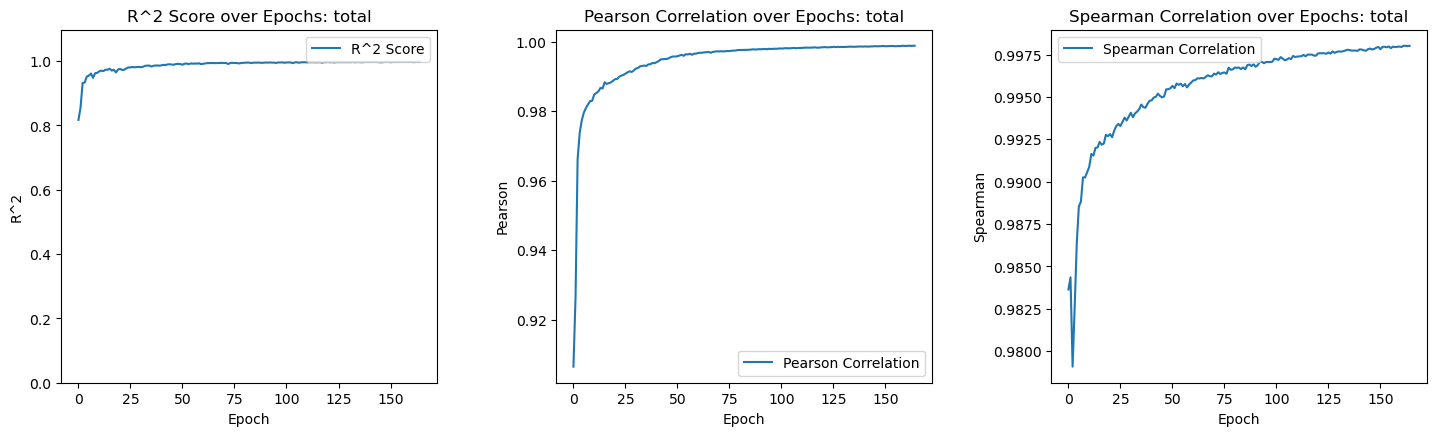

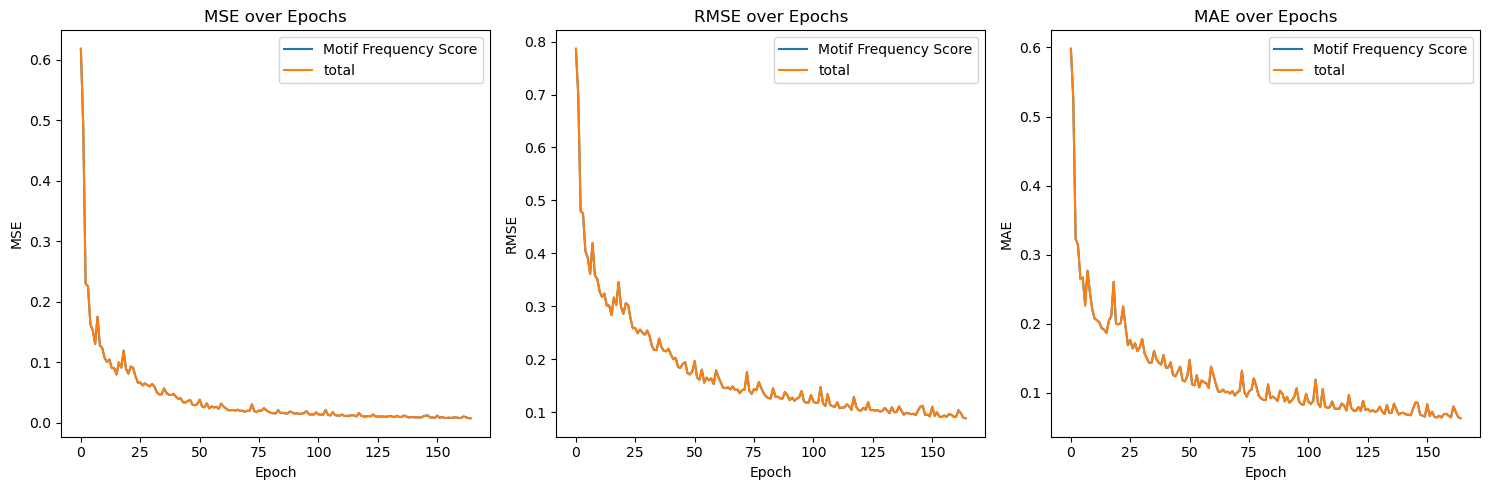

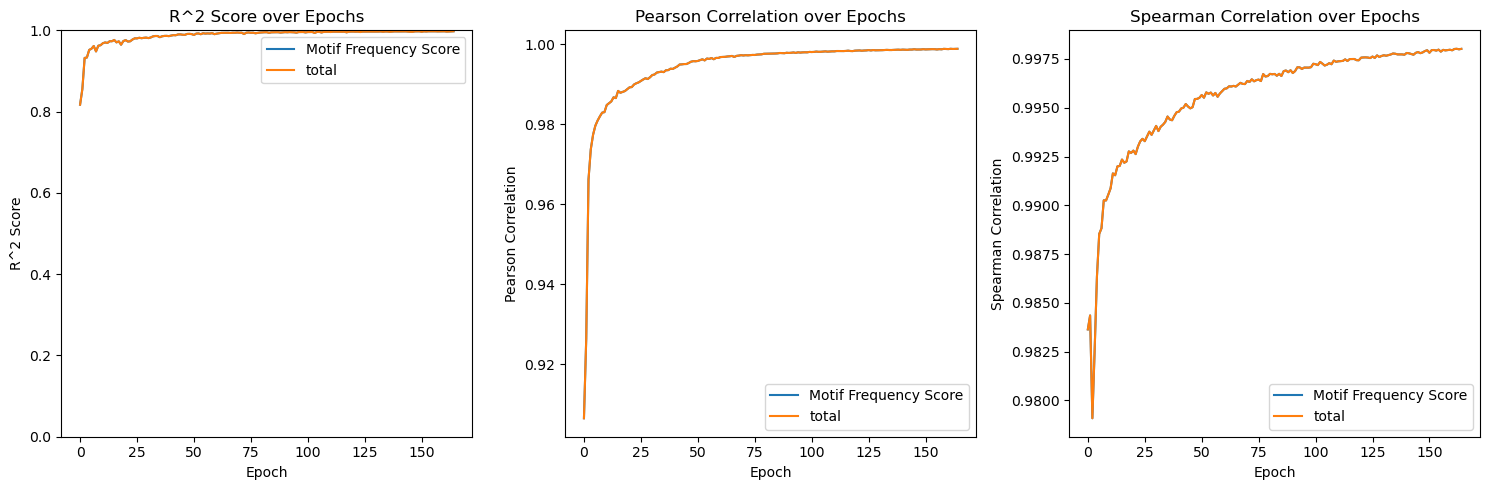

MSE: 0.0078, RMSE: 0.0882, MAE: 0.0634
R^2: 0.9977, Pearson Correlation: 0.9989, Spearman Correlation: 0.9980


In [5]:
#best_r2_epoch = 164

model_path = f'/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Freq_Results/DanQ_synthetic_freq_motif_results/model_epoch_{best_r2_epoch}.pth'

mse, rmse, mae, r2, pearson_corr, spearman_corr = regression_model_plot(
    model, test_loader, train_losses_by_batch, test_losses_by_batch, 
    device, results, label_mode = "score", save_plot = False, dir_path = None, model_path = model_path, best_model=best_r2_epoch)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}, Pearson Correlation: {pearson_corr:.4f}, Spearman Correlation: {spearman_corr:.4f}")

# Train ConvNetDeep

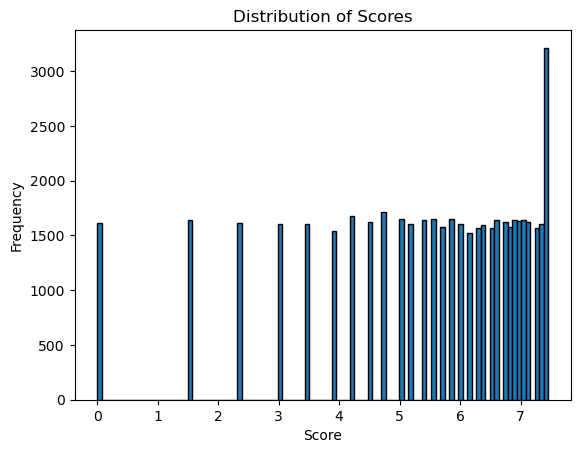

Using device: cuda
Model is on device: cuda:0
Epoch 1/200, Step 1/100, Loss: 41.9449
Epoch 1/200: Train Loss: 20.4717 , Test Loss: 9.7341
------------------------Evaluation------------------------
Label 1: MSE=9.7341, RMSE=3.1200, MAE=3.0812, R^2=-1.8785, Pearson=0.9639, Spearman=0.9676
Overall (Flattened): MSE=9.7341, RMSE=3.1200, MAE=3.0812, R^2=-1.8785, Pearson=0.9639, Spearman=0.9676
----------------------------------------------------------
Epoch 2/200, Step 1/100, Loss: 7.2511
Epoch 2/200: Train Loss: 3.0853 , Test Loss: 2.8592
------------------------Evaluation------------------------
Label 1: MSE=2.8592, RMSE=1.6909, MAE=1.6246, R^2=0.1545, Pearson=0.9726, Spearman=0.9785
Overall (Flattened): MSE=2.8592, RMSE=1.6909, MAE=1.6246, R^2=0.1545, Pearson=0.9726, Spearman=0.9785
----------------------------------------------------------
Epoch 3/200, Step 1/100, Loss: 0.8948
Epoch 3/200: Train Loss: 0.4898 , Test Loss: 1.4081
------------------------Evaluation------------------------
L

In [8]:
# Define some hyperparameters
seed = 42
batch = 400
learning_rate = 1e-4
target_labels = ['Motif Frequency Score']
output_dir = '/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Freq_Results/ConvNetDeep_synthetic_freq_motif_results'


#df = pd.DataFrame({'sequence':dna_sequences, 'score': scores})
df = pd.read_pickle("/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Freq_Results/synthetic_freq_sequence.pl")
# Plot histogram of scores
plt.hist(df['score'], bins=100, edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
#plt.ylim(0,300)
plt.show()

train, test = split_dataset(df, split_type='random', cutoff = 0.8, seed = seed)

train = EnhancerDataset(train, feature_list=['score'], scale_mode = 'none')
test = EnhancerDataset(test, feature_list=['score'], scale_mode = 'none')

# DataLoader setup
train_loader = DataLoader(dataset=train, batch_size=batch, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=batch, shuffle=True)

input_model = ConvNetDeep(num_classes=1, drop_out=0.3)
_, _, model, train_losses_by_batch, test_losses_by_batch, results, best_pearson_epoch, best_r2_epoch, device  = train_model(input_model, train_loader, test_loader, 
                                                                                                                            target_labels=target_labels,num_epochs=200, 
                                                                                                                        batch_size=batch, learning_rate=learning_rate, 
                                                                                                                        criteria='mse',optimizer_type = "adam", patience=10, 
                                                                                                                        seed = seed, save_model= True, dir_path=output_dir)                                  

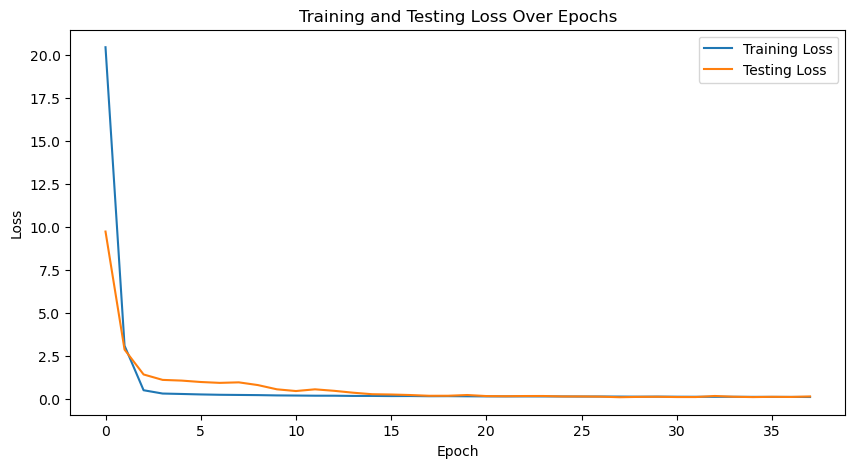

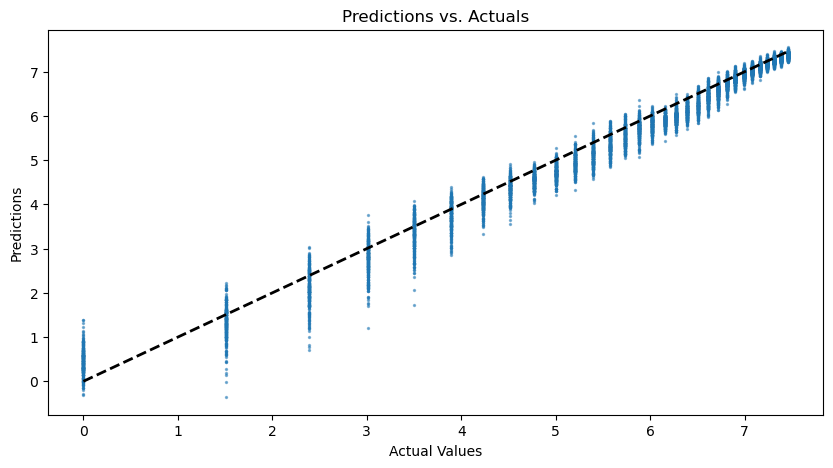

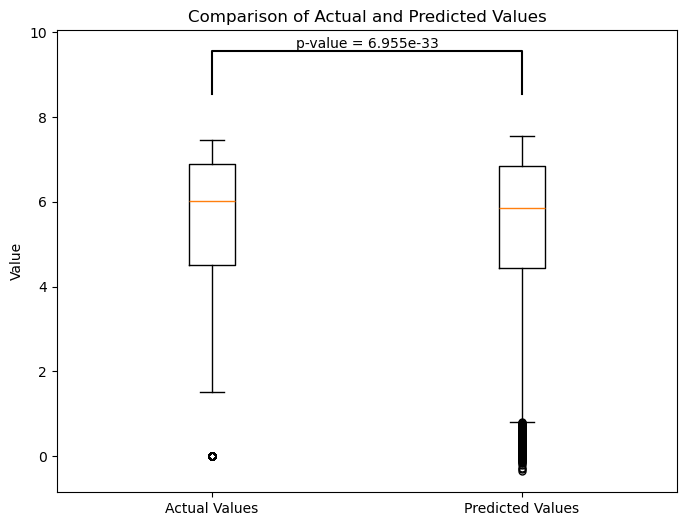

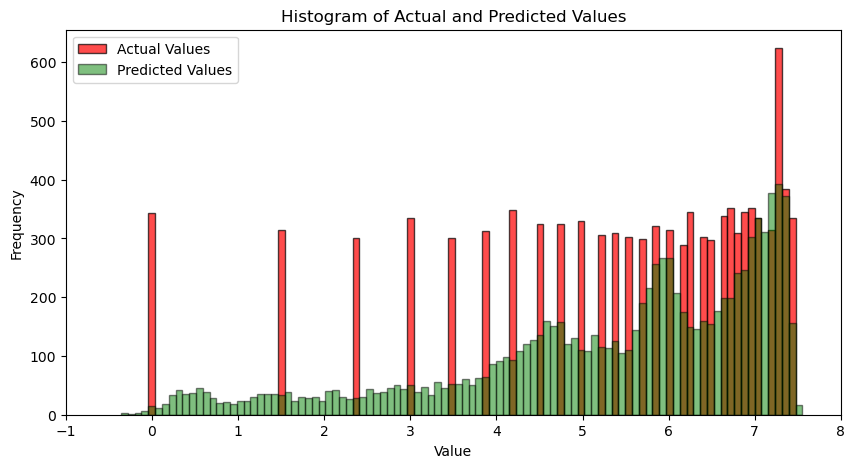

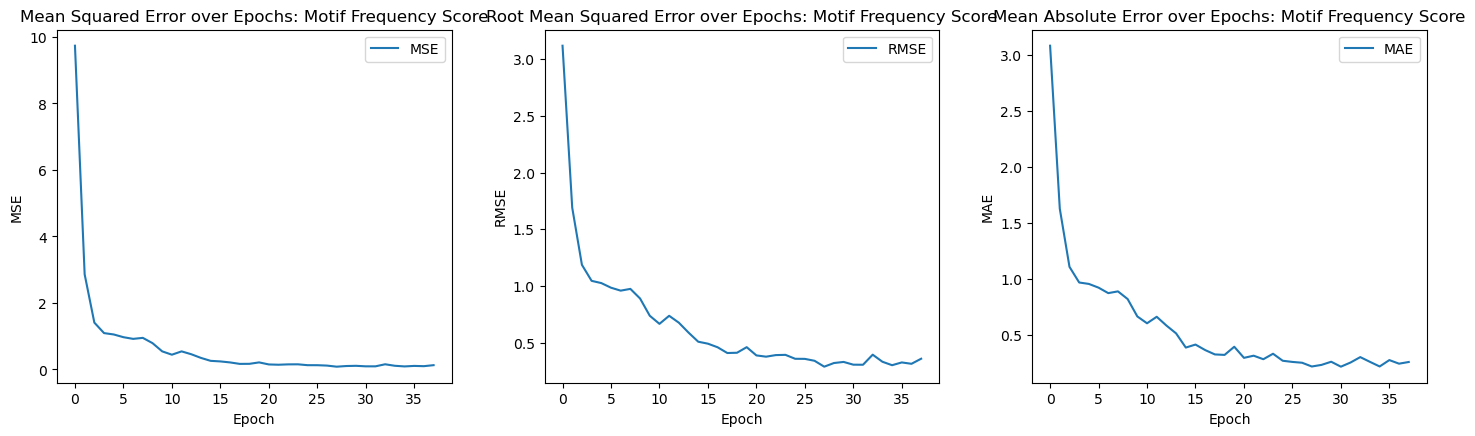

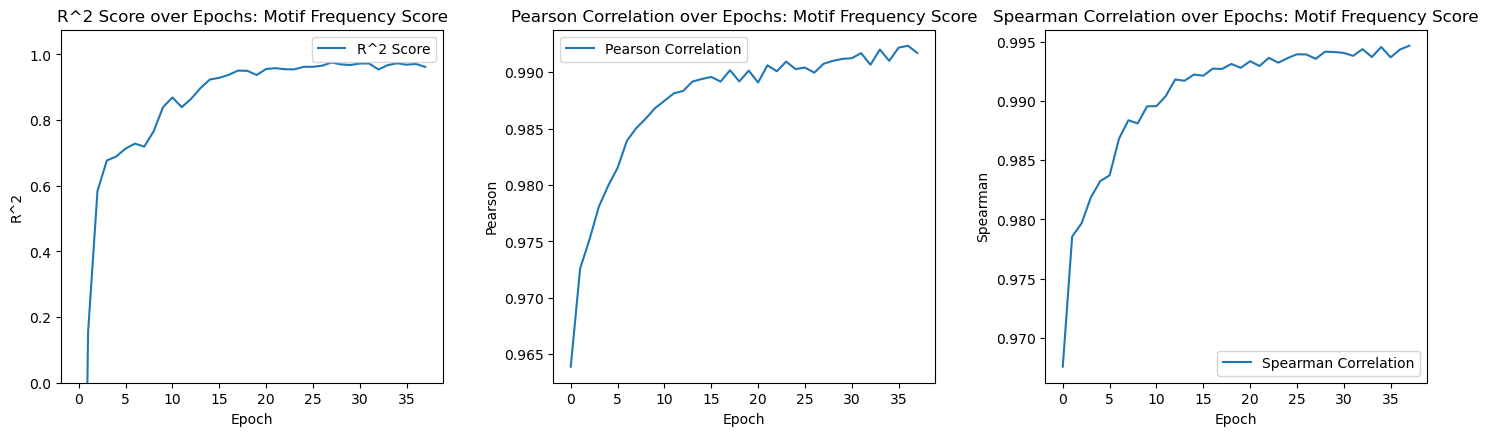

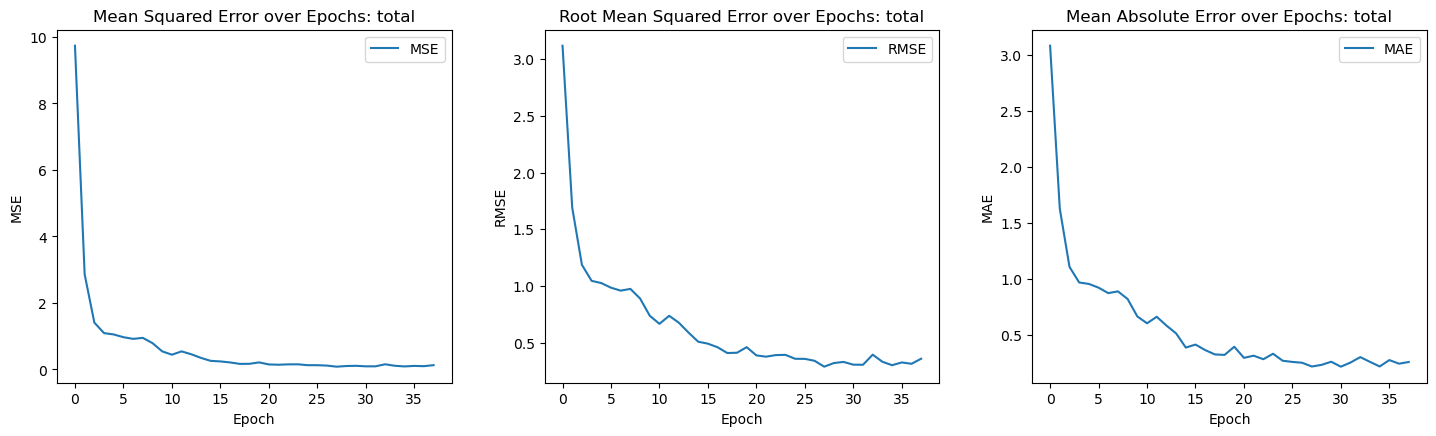

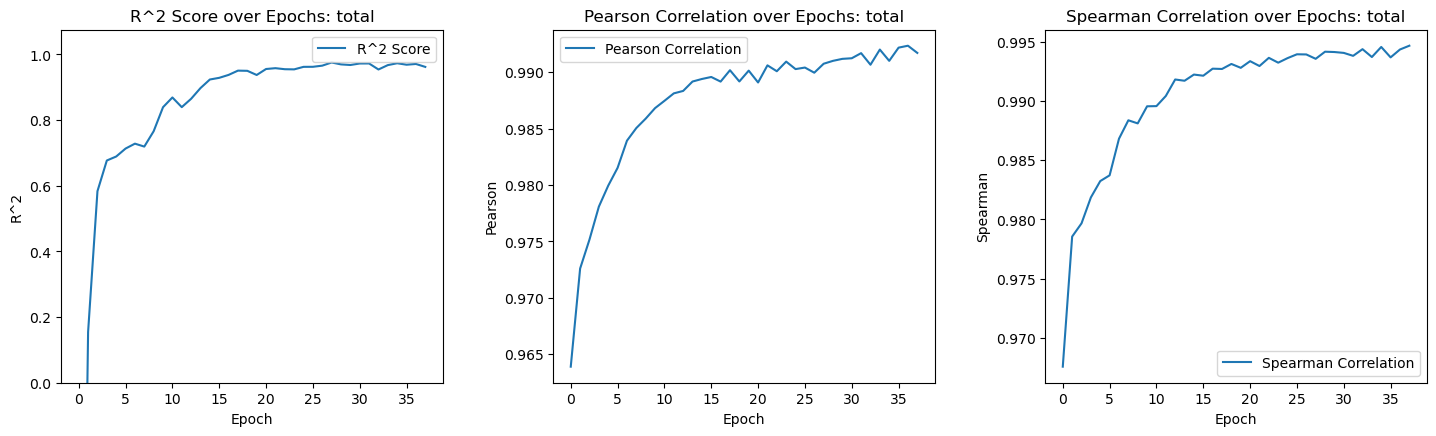

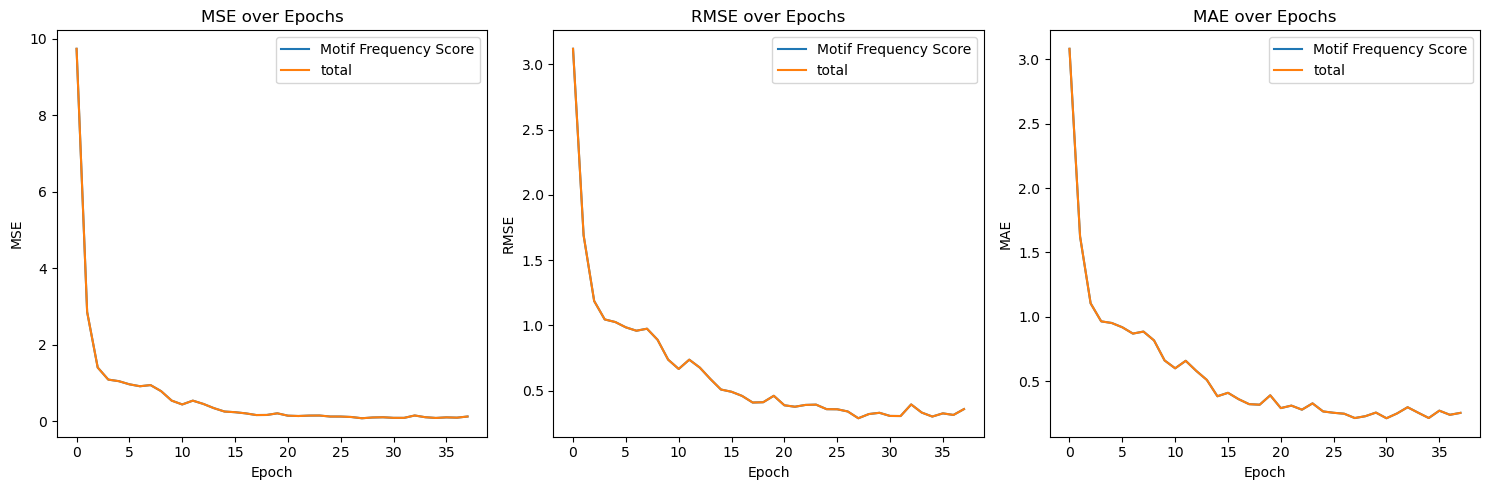

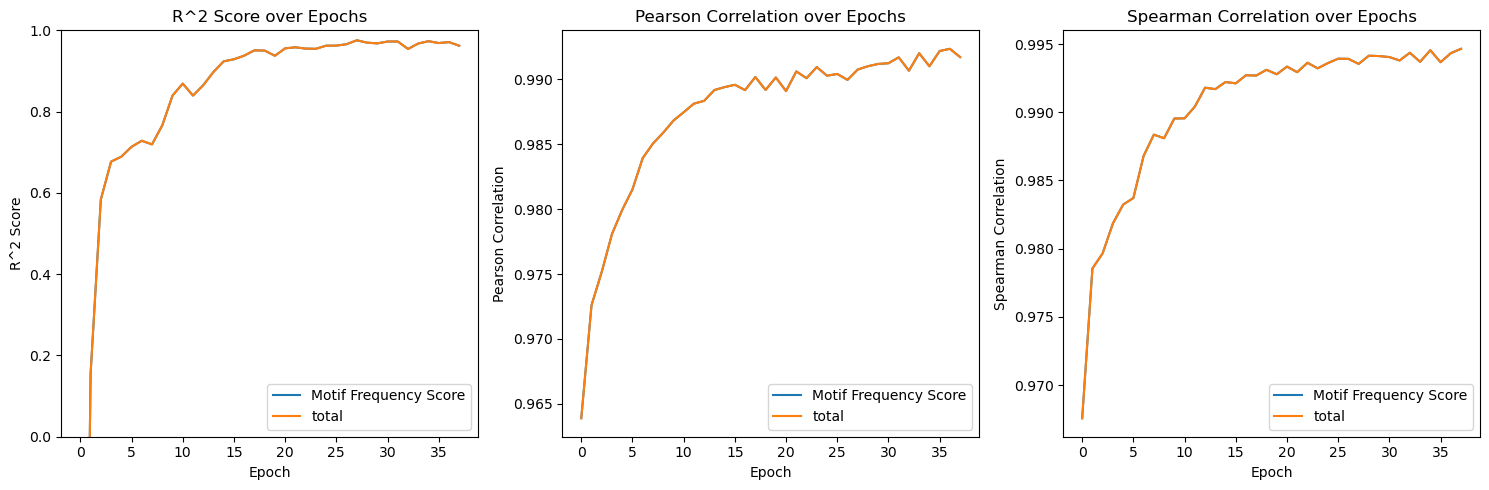

MSE: 0.1281, RMSE: 0.3580, MAE: 0.2546
R^2: 0.9621, Pearson Correlation: 0.9917, Spearman Correlation: 0.9947


In [9]:
#best_r2_epoch = 120

model_path = f'/pmglocal/ty2514/Enhancer/Enhancer/data/Synthetic_Freq_Results/ConvNetDeep_synthetic_freq_motif_results/model_epoch_{best_r2_epoch}.pth'

mse, rmse, mae, r2, pearson_corr, spearman_corr = regression_model_plot(
    model, test_loader, train_losses_by_batch, test_losses_by_batch, 
    device, results, label_mode = "score", save_plot = False, dir_path = None, model_path = model_path, best_model=best_r2_epoch)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}, Pearson Correlation: {pearson_corr:.4f}, Spearman Correlation: {spearman_corr:.4f}")